# Cyclones Near Taiwan
In this notebook, I extract cyclone trajectories near Taiwan.

## Prerequisites
Before running this notebook, one needs to
- Run the notebook `data_cleaning/coastlines_near_taiwan.ipynb` first.
- Download a cyclone dataset from https://www.ncdc.noaa.gov/ibtracs/index.php?name=ib-v4-access. Click the link `CSV (Comma Separated Values)` and then download `ibtracs.WP.list.v04r00.csv`. `WP` stands for Western Pacific ocean, where Taiwan locates. Put this file in `datasets/ibtracs/`. This dataset seems to change over time. More and more cyclones are added. So the dataset you downloaded may differ from mine, and yields different analysis result. I downloaded this on 2021/10/30.

## The program starts here

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy.linalg import norm
%config InlineBackend.figure_format = 'jpg'

Here loads the coastlines near Taiwan. This will be used for visualization.

In [2]:
coastlines = []
with open('../repository/coastlines_near_taiwan.npy', 'rb') as f:
    try:
        while True:
            coastlines.append(np.load(f))
    except:
        pass

Here reads the cyclone dataset. Only some attributes are needed. The resulting pandas dataframe is saved as a file, so that it can be loaded quickly if this notebook is restarted.

In [3]:
df = pd.read_csv(
    '../datasets/ibtracs/ibtracs.WP.list.v04r00.csv', skiprows=[1], 
    usecols=['SID', 'NUMBER', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'TRACK_TYPE']
)
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df.to_pickle('../repository/ibtracs.WP.list.v04r00_tmp.pkl')

In [4]:
df = pd.read_pickle('../repository/ibtracs.WP.list.v04r00_tmp.pkl')
print(df.shape)

(239637, 8)


In [5]:
df.head(50)

,SID,NUMBER,NAME,ISO_TIME,NATURE,LAT,LON,TRACK_TYPE
0,1884177N17124,14,NOT_NAMED,1884-06-24 16:00:00,NR,16.5000,124.000,main
1,1884177N17124,14,NOT_NAMED,1884-06-24 18:00:00,NR,16.5373,123.800,main
2,1884177N17124,14,NOT_NAMED,1884-06-24 21:00:00,NR,16.5978,123.500,main
3,1884177N17124,14,NOT_NAMED,1884-06-25 00:00:00,NR,16.6706,123.200,main
4,1884177N17124,14,NOT_NAMED,1884-06-25 03:00:00,NR,16.7633,122.900,main
5,1884177N17124,14,NOT_NAMED,1884-06-25 04:00:00,NR,16.8000,122.800,main
6,1884177N17124,14,NOT_NAMED,1884-06-25 06:00:00,NR,16.8828,122.600,main
7,1884177N17124,14,NOT_NAMED,1884-06-25 09:00:00,NR,17.0259,122.300,main
8,1884177N17124,14,NOT_NAMED,1884-06-25 12:00:00,NR,17.1835,122.000,main
9,1884177N17124,14,NOT_NAMED,1884-06-25 15:00:00,NR,17.3463,121.700,main


In [6]:
print(df.memory_usage(deep=True).sum(), sys.getsizeof(df))
print(df.memory_usage(deep=True))

68462694 68462710
Index              128
SID           16774590
NUMBER         1917096
NAME          15225704
ISO_TIME       1917096
NATURE        14138583
LAT            1917096
LON            1917096
TRACK_TYPE    14655305
dtype: int64


In the following, I filtered the cyclones according to their attributes. The detailed information of these attributes can be found in `IBTrACS Technical Documentation` and `IBTrACS_v04_column_documentation.pdf` at
https://www.ncdc.noaa.gov/ibtracs/index.php?name=ib-v4-access.

Track type "provisional" means this cyclone is very new in time and its status hasn't been reviewed and confirmed. Track type involving "spur" means this cyclone splits or merges and has multiple trajectories. I am interested only in the cyclones with "main" track type, where the statuses are of very high reliability and have unique trajectories.

In [7]:
print(df['TRACK_TYPE'].value_counts())
df = df[df['TRACK_TYPE'] == 'main']

main           233713
spur-merge       2290
PROVISIONAL      1904
spur-split        871
spur-other        859
Name: TRACK_TYPE, dtype: int64


An sid is a unique id for a cyclone. <br>
Next we see that no redundant records exist and the records are already sorted in time.

In [8]:
df[['SID', 'ISO_TIME']].shape, df[['SID', 'ISO_TIME']].drop_duplicates().shape

((233713, 2), (233713, 2))

In [9]:
(df[['SID', 'ISO_TIME']] == df[['SID', 'ISO_TIME']].sort_values(by=['SID', 'ISO_TIME'])).all()

SID         True
ISO_TIME    True
dtype: bool

Next we see that the status of a cyclone is recorded every 1, 2, or 3 hours. After dropping records which is at n o'clock with n % 3 != 0, we get a evenly sampled time series at a frequency of every 3 hours. This dataset is very neat.

In [10]:
groupby = df.groupby('SID')
pd.concat([
    group['ISO_TIME'].diff()
for sid, group in groupby]).value_counts()
# already sorted

0 days 03:00:00    212687
0 days 01:00:00      8565
0 days 02:00:00      8499
Name: ISO_TIME, dtype: int64

In [11]:
df = df[df['ISO_TIME'].dt.hour % 3 == 0]
groupby = df.groupby('SID')
pd.concat([
    group['ISO_TIME'].diff()
for sid, group in groupby]).value_counts()

0 days 03:00:00    220184
Name: ISO_TIME, dtype: int64

A cyclone may live long and travel far. However, we are interested only in its behavior near Taiwan. In the following we are going to extract relevant parts from relevant cyclones.

Taiwan ranges about 22&deg;N ~ 25&deg;N and 120&deg;E ~ 122&deg;E. This does not range so large so let's assume the area near Taiwan is a plane.<br> Also, I arbitrarily set the center of Taiwan as (121&deg;E, 23.5&deg;N).<br>
With simple knowledge from earth science and Haversine formula, we find that
- The length of 1&deg; of longitude is about 111.2 km when latitude is around 0&deg;
- The length of 1&deg; of longitude is about 102 km when latitude is around 23.5&deg;
- The length of 1&deg; of latitude is about 111.2 km everywhere

With these conditions, we convert the location of cyclones, provided in the dataset as longitude and latitude, into kilometers, with the origin (0, 0) km of the new Cartesian coordinate system assigned to the center of Taiwan. We will convert everything to km and leave longitude and latitude out. This keeps things simple.

In [12]:
taiwan_loc = (121., 23.5)
km_per_lon, km_per_lat = 102., 111.2

In [13]:
df['x'] = (df['LON'] - taiwan_loc[0]) * km_per_lon
df['y'] = (df['LAT'] - taiwan_loc[1]) * km_per_lat

Now I am going to define what is called near Taiwan.<br>
The farthest border from the center of Taiwan is at the Northern or Southern border. The distance is about 1.5&deg; in latitude, which equals about 170 km. Typically, the radius of a cyclone is about 250 km. Combining these facts, a cyclone has to be less than or equal to 170 + 250 = 420 km apart from the center of Taiwan to influence Taiwan. Let's give it a looser condition, say, 500 km. So we are interested in cyclones which ever enter the 500-km area around the center of Taiwan. We call these relevant cyclones. <br>
For a relevant cyclone, again, we are only interested in the part of its trajectory which is near Taiwan. We need to decide a bound such that only the part of a trajectory within this bound is extracted. This bound cannot be too tight, since a cyclone may go inside this bound, then go outside, and then go inside again. This breaks the revelant part of a trajectory into multiple pieces. To avoid this situation, we want a bound such that every relevant cyclone enters this bound exactly once. We find 1250 km is a rather tight bound satisfying the requirement. <br>
I have found two cyclones, Faye in 1982 and June in 1964, such that if the bound is less than 1250 km, we likely have multiple revelant pieces of their trajectories. I plot their trajectories soonly. The green circle is 500-km bound and the red one is 1250-km. One can go to https://en.wikipedia.org/wiki/Typhoon_Faye_(1982)#Meteorological_history and https://en.wikipedia.org/wiki/1964_Pacific_typhoon_season#Tropical_Storm_June_(Toyang) to comfirm that these two cyclones are real in the history.

In [14]:
dist_close, range_of_interest = 500., 1250.
print((
    taiwan_loc[0] + dist_close / km_per_lon, 
    taiwan_loc[0] - dist_close / km_per_lon, 
), ( 
    taiwan_loc[1] + dist_close / km_per_lat, 
    taiwan_loc[1] - dist_close / km_per_lat, 
))
print((
    taiwan_loc[0] + range_of_interest / km_per_lon, 
    taiwan_loc[0] - range_of_interest / km_per_lon, 
), ( 
    taiwan_loc[1] + range_of_interest / km_per_lat, 
    taiwan_loc[1] - range_of_interest / km_per_lat, 
))

(125.90196078431373, 116.09803921568627) (27.99640287769784, 19.00359712230216)
(133.2549019607843, 108.74509803921569) (34.7410071942446, 12.258992805755396)


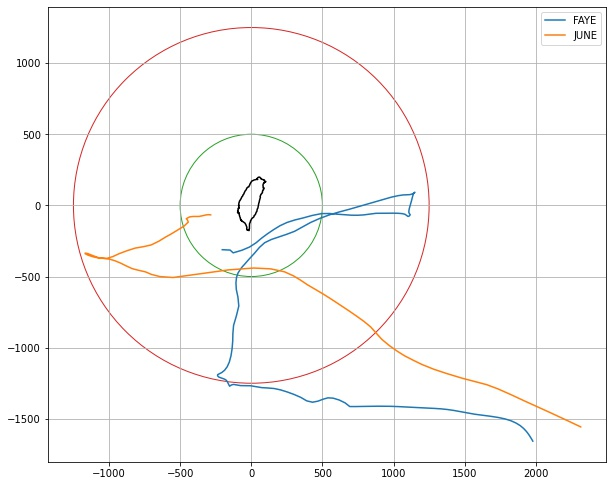

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
for sid in ['1982227N09140', '1964222N10144']:
    group = groupby.get_group(sid)
    ax.plot(group['x'], group['y'], '-', label=group['NAME'].iat[0]);
ax.add_patch(plt.Circle((0., 0.), dist_close, fill=False, color='C2'))
ax.add_patch(plt.Circle((0., 0.), range_of_interest, fill=False, color='C3'))
ax.plot(coastlines[0][0], coastlines[0][1], c='black')
ax.grid();
ax.set_aspect('equal');
ax.legend();


In [16]:
df['dist'] = norm(df[['x', 'y']], axis=1)
df['segment_id'] = (df['dist'] > range_of_interest).cumsum()
df = df[df['dist'] <= range_of_interest]
groupby = df.groupby(['SID', 'segment_id'])
df = df[groupby['dist'].transform('min') <= dist_close]

In [17]:
print(df['SID'].unique())
groupby = df.groupby('SID')
print(groupby.ngroups)
print(groupby['segment_id'].unique().apply(len).value_counts())

['1884177N17124' '1884191N15127' '1884201N18129' ... '2019268N10155'
 '2019314N14136' '2019322N11144']
1021
1    1021
Name: segment_id, dtype: int64


The output of the above cell says that we have 1021 revelant cyclones with a time range from year 1884 to year 2019, and each cyclone has exactly one revelant part of its trajectory. If one set `range_of_interest` less than 1250, say, 1000, and run the code again, he or she will see that some cyclones has multiple revelant pieces of their trajectories.

We now give all revelant trajectories a plot. We will have prettier plots in `data_analysis/cyclones.ipynb`.

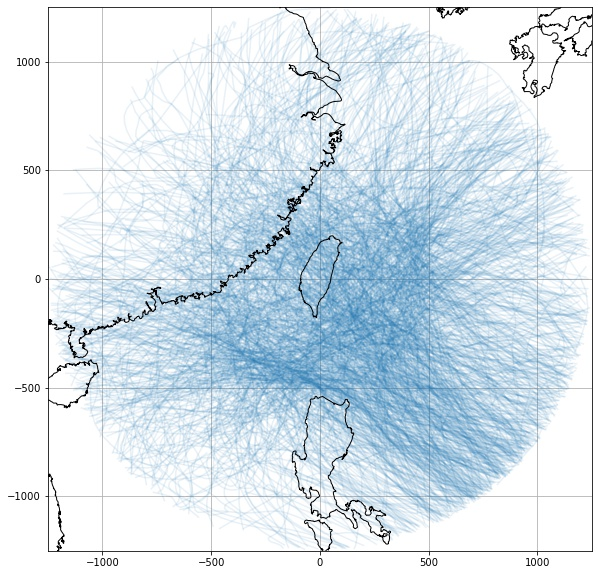

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
for sid, group in groupby:
    ax.plot(group['x'], group['y'], '-', c='C0', alpha=.1);
for cl in coastlines:
    ax.plot(cl[0], cl[1], c='black', linewidth=1)
ax.set_xlim(-range_of_interest, range_of_interest)
ax.set_ylim(-range_of_interest, range_of_interest)
ax.set_aspect('equal');
ax.grid()

Here shows the lengths of revelant trajectories. The mode is around 30. Recall that the statuses of the cyclones are recorded every 3 hours. This means a trajectory is revelant for about 30 * 3 = 90 hours, which is about 4 days.

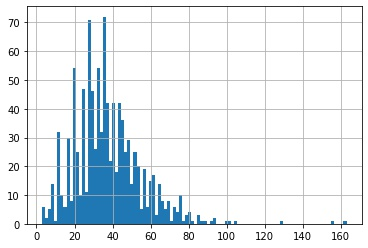

In [19]:
groupby.size().hist(bins=100);

We saved the extracted trajectories as a file for later analysis.

In [20]:
df[['SID', 'NAME', 'ISO_TIME', 'x', 'y']].to_pickle('../repository/cyclones_taiwan.pkl')

The program ends here.

## Environment
This is the base anaconda environment. No additional package is installed.

In [21]:
import sys
print(sys.executable.split('/')[-3])

anaconda3
